In [1]:
#importing  important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx

In [3]:
#load datastes 
df=pd.read_csv("emotion_dataset_2.csv")

In [4]:
#preview dataset
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [5]:
#shape
df.shape

(34792, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34792 non-null  int64 
 1   Emotion     34792 non-null  object
 2   Text        34792 non-null  object
 3   Clean_Text  34326 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [7]:
#datatypes
df.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [8]:
#check for missing value 
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [9]:
# value counts of emotions 
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:>

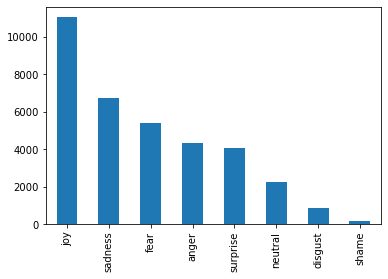

In [10]:
# value counts of emotions 
df['Emotion'].value_counts().plot(kind='bar')

#using seaborn to plot
sns.countplot(df['Emotion'])


<AxesSubplot:xlabel='Emotion', ylabel='count'>

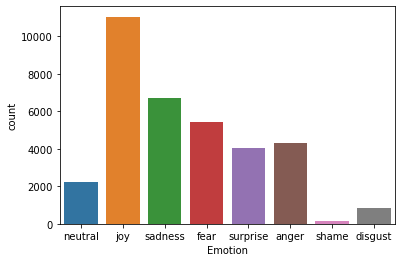

In [11]:
#new method
sns.countplot(x='Emotion',data=df)


###EXPLORATION
+ TEXT CLEANING
+ SENTIMENT ANALYSIS
+ KEYWORD EXTRACTION
    - KEYWORD FOR EACH EMOTION 
    - WORDCLOUD
   

In [12]:
#sentiment Analysis
from textblob import TextBlob

In [13]:
#creating function 
def get_sentiment(text): 
    #pass text function from text class by creating a blob
    blob = TextBlob(text) 
    #see what is a blob 
    sentiment = blob.sentiment.polarity 
    if sentiment > 0:
        result = "positive"
    elif sentiment <0:
        result = "negetive"
    else:
        result = "neutral"
    return result
        

In [14]:
#test your function 
get_sentiment("i love coding")

'positive'

In [15]:
#apply function on whole data set 
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [16]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,negetive
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,neutral


In [17]:
#comparing our emotion and our sentiment to see how many percentage of 
#our emotions are negetive positive and neutral 
df.groupby(['Emotion','Sentiment']).size()


Emotion   Sentiment
anger     negetive     1787
          neutral      1386
          positive     1124
disgust   negetive      325
          neutral       249
          positive      282
fear      negetive     1534
          neutral      1843
          positive     2033
joy       negetive     1682
          neutral      3648
          positive     5715
neutral   negetive      178
          neutral      1523
          positive      553
sadness   negetive     2630
          neutral      2127
          positive     1965
shame     negetive       46
          neutral        50
          positive       50
surprise  negetive      623
          neutral      1545
          positive     1894
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

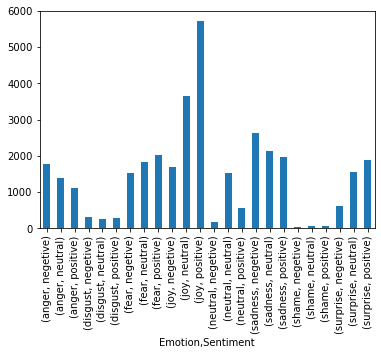

In [18]:
#first method: using matplotlib
#compare our emotion vs Sentiment 
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

#the upper can be very confusing so we use a diffetent plot using seaborn which
#which has two function sns.factorplot and sns.countplot(counts the entire columns) 
#catplot(catgorical plot) is going to check the entire list and count them per catagories
#same as the factor plot 
#m-2



C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


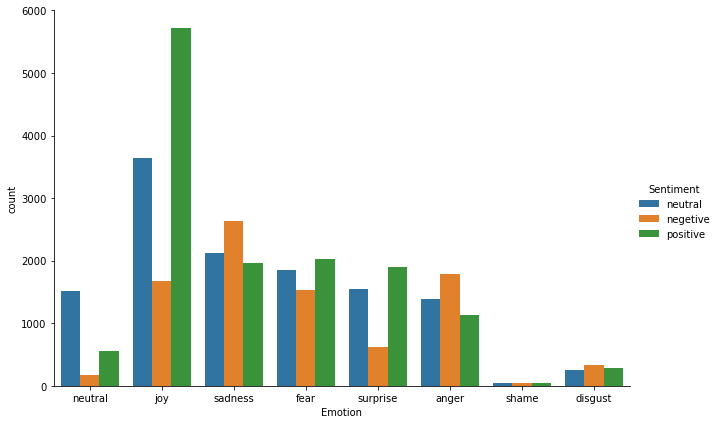

In [19]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

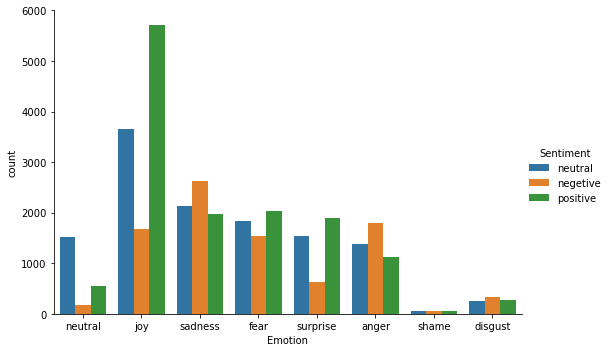

In [20]:
#updating the code 
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',aspect=1.5)

# text cleaning
+ Removing noise
    - stopwords
    - specialchar
    - punctions
    - emogis
All these we are suppose to clean from the data 


In [21]:
dir(nfx)
#gives you many tools for cleaning 

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [22]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [23]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [24]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [25]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)


In [26]:
df[['Text','Clean_Text']]


,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


###keyword extraction 
+ extract most commononest words per class of emotion


In [27]:
from collections import Counter

In [28]:
 def extract_keywords(text,num=50):
        tokens = [tok for tok in text.split()]
        most_common_tokens = Counter(tokens).most_common(num)
        return dict(most_common_tokens)

In [29]:
emoiton_list = df['Emotion'].unique().tolist()


In [30]:
emoiton_list 

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [31]:
df[df['Emotion'] =='joy']

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,neutral
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,neutral
12,12,joy,"For once in his life , Leopold must have been ...",life Leopold truly happy : hopes prayers belo...,positive
17,17,joy,I have a feeling i will fail french #fuckfrench,feeling fail french #fuckfrench,negetive
...,...,...,...,...,...
34778,34778,joy,"In other news, my mum made EFO.",news mum EFO,negetive
34784,34784,joy,~ As musicas que nois danço com os munitores t...,~ musicas que nois danço com os munitores todo...,positive
34785,34785,joy,When I understood that I was admitted to the U...,understood admitted University,neutral
34786,34786,joy,Tuesday woken up to Oscar and Cornet practice X,Tuesday woken Oscar Cornet practice X,neutral


In [32]:
joy_list = df[df['Emotion'] =='joy']['Clean_Text'].tolist()

In [33]:
joy_docx = ' '.join(joy_list)

In [34]:
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [35]:
keyword_joy = extract_keywords(joy_docx)

In [36]:
keyword_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [37]:
#plot
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} Most Common Keywords".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

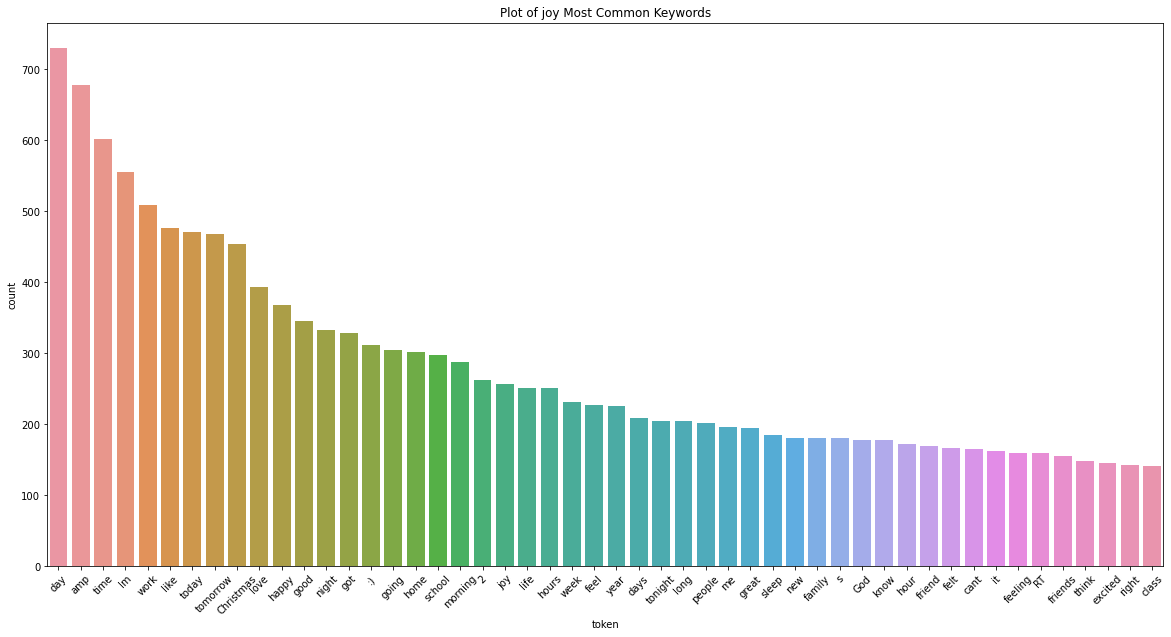

In [38]:
plot_most_common_words(keyword_joy,"joy")

In [39]:
surprise_list = df[df['Emotion'] =='surprise']['Clean_Text'].tolist()
#document
surprise_docx = ''.join(surprise_list)
#extract keywords
keyword_surprise = extract_keywords(surprise_docx)

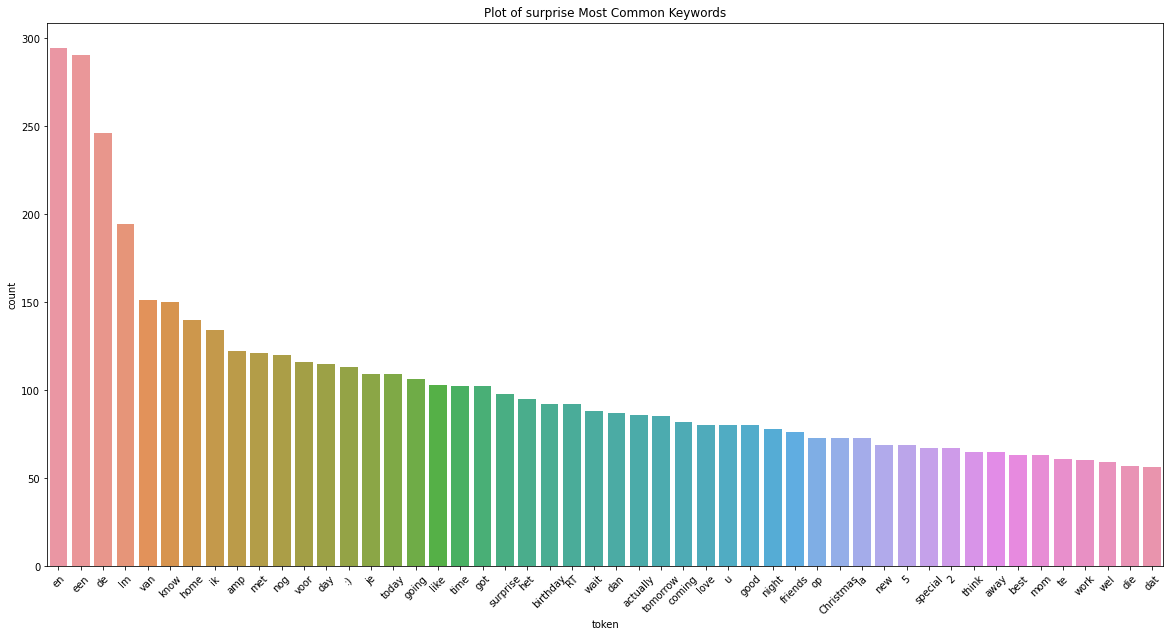

In [40]:
plot_most_common_words(keyword_surprise,"surprise")

In [41]:
###word Cloud
from wordcloud import WordCloud


In [42]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize = (20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

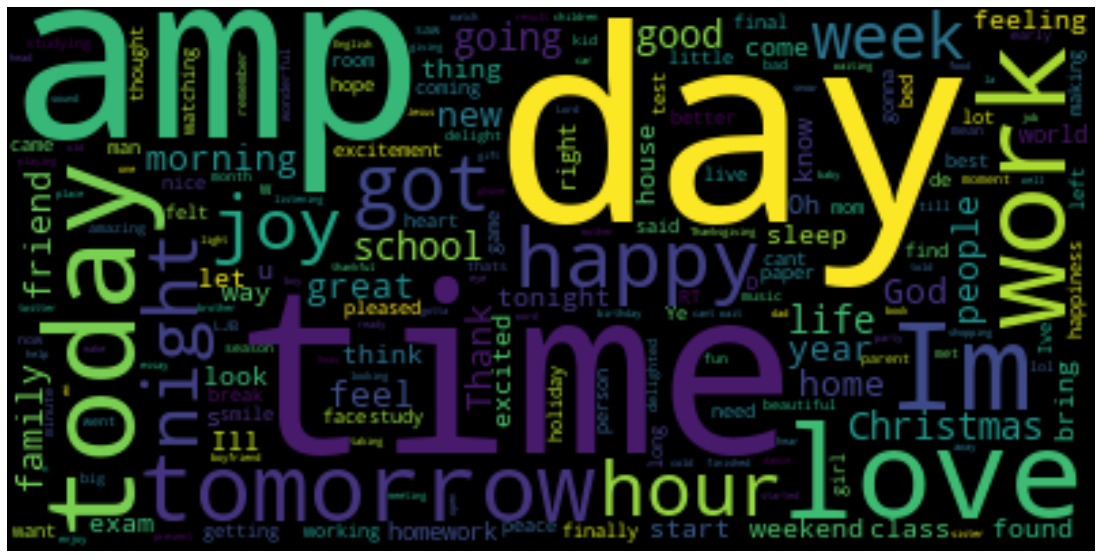

In [43]:
plot_wordcloud(joy_docx)

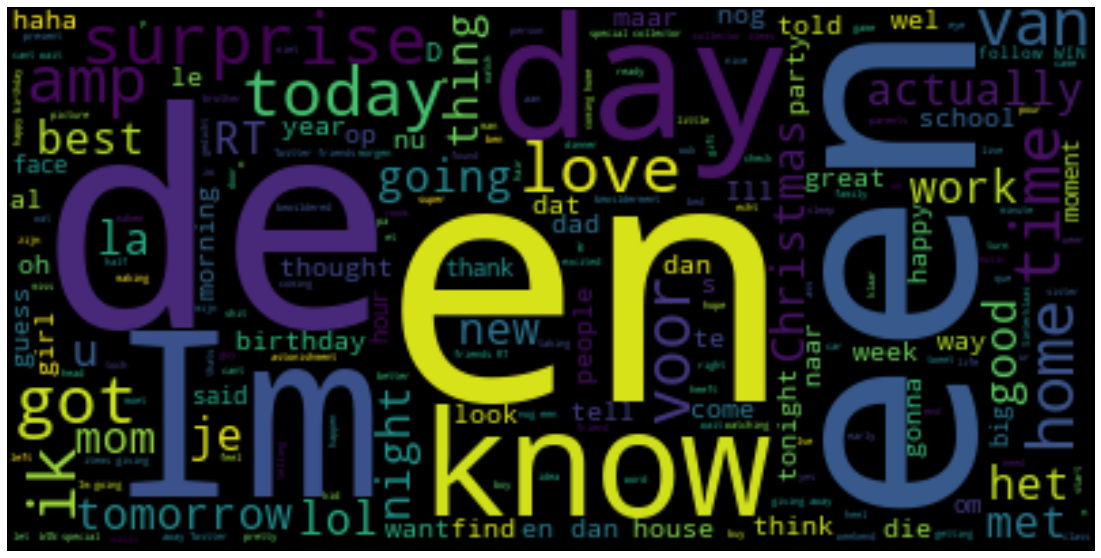

In [44]:
plot_wordcloud(surprise_docx)

###Meachine Learning
* Naive Bayes
* Logistic Regression
* KNN
* Decision Tree


In [75]:
#load the packages 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
#vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
### build Features from our data set 

In [78]:
Xfeatures= df['Clean_Text']
Ylabels=df['Emotion']

In [88]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [89]:
#vectorizerr
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [95]:
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [91]:
#to dense array
#X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [97]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Ylabels,test_size=0.3,random_state = 42)

In [98]:
nv_model = MultinomialNB()
nv_model.fit(X_train,Y_train)

MultinomialNB()

In [99]:
#accuracy
#method 1
nv_model.score(X_test,Y_test)

0.5642843456600881

In [105]:
#predictions
Y_pred_for_nv = nv_model.predict(X_test)

In [106]:
Y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

###make a single prediction 
+vectorized our text
+applied our model 


In [107]:
sample_text = ["i love coding so much"]

In [108]:
vect = cv.transform(sample_text).toarray()

In [111]:
#make prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [112]:
#check for the prediction prob (percentage) confidence score
nv_model.predict_proba(vect)

array([[7.71887420e-03, 4.32378488e-04, 6.13255211e-02, 6.78601776e-01,
        1.91245761e-04, 2.40467259e-01, 1.63388024e-06, 1.12613108e-02]])

In [114]:
#get all our classes for our model 
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [115]:
np.max(nv_model.predict_proba(vect))

0.6786017763391645

In [137]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0],np.max(pred_proba)))
    print(prediction[0])
    return pred_percentage_for_all
    

In [138]:
predict_emotion(sample_text,nv_model)

Prediction:joy, Prediction Score:0.6786017763391645
joy


{'anger': 0.007718874198816172,
 'disgust': 0.0004323784877583124,
 'fear': 0.06132552108584217,
 'joy': 0.6786017763391645,
 'neutral': 0.00019124576121008267,
 'sadness': 0.24046725945228875,
 'shame': 1.6338802443624819e-06,
 'surprise': 0.011261310794677947}

In [139]:
predict_emotion(["he hates running all day"],nv_model)

Prediction:joy, Prediction Score:0.9089665715897578
joy


{'anger': 0.01036693357152914,
 'disgust': 0.0003195563339480684,
 'fear': 0.009997815369441419,
 'joy': 0.9089665715897578,
 'neutral': 5.800043787193291e-05,
 'sadness': 0.047719525231977804,
 'shame': 4.351322032698918e-07,
 'surprise': 0.022571162333268505}

In [140]:
#model evaluation
print(classification_report(Y_test,Y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [141]:
#confusion matrix
confusion_matrix(Y_test,Y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


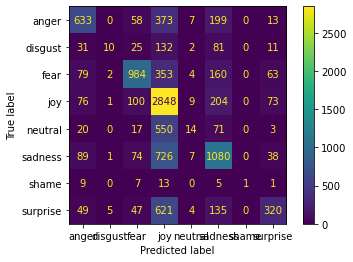

In [142]:
#plot sonfusion matrix
plot_confusion_matrix(nv_model,X_test,Y_test)

###save model

In [143]:
import joblib

In [144]:
model_file = open("emotion_classifier_nv_model","wb")
joblib.dump(nv_model,model_file)
model_file.close()

#model interpration
 + eli5
 + lime
 + sharp 

In [147]:
#logisticRegression 
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
#accuracy
lr_model.score(X_test,Y_test)

0.622341444721211

In [149]:
#single_predict
predict_emotion(sample_text,lr_model)

Prediction:joy, Prediction Score:0.6906399049145098
joy


{'anger': 0.02453261391660569,
 'disgust': 0.01238876496787644,
 'fear': 0.04928851537969325,
 'joy': 0.6906399049145098,
 'neutral': 0.020004720944678096,
 'sadness': 0.15878333476773046,
 'shame': 0.0008613485060368044,
 'surprise': 0.043500796602869526}

In [151]:
#interpret model
import eli5

In [152]:
eli5.show_weights(lr_model,top = 20)

In [155]:
Ylabels.unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [163]:
class_names = Ylabels.unique().tolist()

In [164]:
feature_names = cv.get_feature_names()

In [167]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)

In [168]:
?eli5.show_weights